In [6]:
import pandas as pd
df = pd.read_csv('diabetes (2).csv')
print(df.head())

   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


In [8]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [10]:
print(df.isnull().sum())


PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [12]:
# Podstawowe statystyki opisowe
print(df.describe())


          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

In [14]:

print(df['Diabetic'].value_counts())


Diabetic
0    10000
1     5000
Name: count, dtype: int64


In [16]:

print(df.select_dtypes(include=['number']).corr())


                        PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.006774      -0.001858   
Pregnancies              0.006774     1.000000       0.054502   
PlasmaGlucose           -0.001858     0.054502       1.000000   
DiastolicBloodPressure   0.008746     0.043528       0.007212   
TricepsThickness        -0.002406     0.063605       0.027100   
SerumInsulin            -0.020698     0.104487       0.033545   
BMI                     -0.003156     0.086386       0.020653   
DiabetesPedigree        -0.015413     0.054240       0.009057   
Age                     -0.007096     0.136972       0.038864   
Diabetic                -0.012494     0.407315       0.128004   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.008746         -0.002406   
Pregnancies                           0.043528          0.063605   
PlasmaGlucose                         0.007212          0.027100   
DiastolicBlo

In [18]:
print(df.dtypes)


PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Oddzielenie cech i zmiennej docelowej
X = df.drop(columns=['PatientID', 'Diabetic'])  
y = df['Diabetic']  # Cel (target)

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Lista kolumn numerycznych
num_features = ['Age', 'Pregnancies', 'BMI', 'DiabetesPedigree']

# Pipeline dla wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))  # Wypełnianie braków średnią
])

# Sprawdzenie brakujących wartości przed transformacją
print('Surowy zbiór danych - zbiór treningowy:')
print(X_train[num_features].isnull().mean())

# Transformacja danych numerycznych
X_train_transformed = num_preparation.fit_transform(X_train[num_features])
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_features)

# Sprawdzenie brakujących wartości po transformacji
print('\nWyjście Pipeline - zbiór treningowy:')
print(X_train_transformed[num_features].isnull().mean())

# Dodanie kolumn kategorycznych na podstawie istniejących danych
X_train['PregnanciesGroup'] = pd.cut(
    X_train['Pregnancies'],
    bins=[-1, 0, 2, 5, np.inf],
    labels=['None', 'Low', 'Medium', 'High']
)

X_train['BMICategory'] = pd.cut(
    X_train['BMI'],
    bins=[-1, 18.5, 24.9, 29.9, np.inf],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

X_train['AgeGroup'] = pd.cut(
    X_train['Age'],
    bins=[0, 20, 30, 40, 50, 60, 70, np.inf],
    labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
)

# Sprawdzenie wyników po dodaniu kolumn
print('\nDane po dodaniu kolumn kategorycznych:')
print(X_train[['PregnanciesGroup', 'BMICategory', 'AgeGroup']].head())



Surowy zbiór danych - zbiór treningowy:
Age                 0.0
Pregnancies         0.0
BMI                 0.0
DiabetesPedigree    0.0
dtype: float64

Wyjście Pipeline - zbiór treningowy:
Age                 0.0
Pregnancies         0.0
BMI                 0.0
DiabetesPedigree    0.0
dtype: float64

Dane po dodaniu kolumn kategorycznych:
      PregnanciesGroup BMICategory AgeGroup
10691             High      Normal    20-29
6152              High       Obese    20-29
7016               Low      Normal    20-29
8035            Medium       Obese    50-59
11491             High      Normal    20-29


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Wszystkie kolumny liczbowe w X_train
num_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Pipeline dla danych numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))  # Wypełnianie braków średnią
])

# Przetwarzanie danych (numeryczne)
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features)
])

# Transformacja danych
X_train_transformed = data_preparation.fit_transform(X_train)

# Wyświetlenie kształtu przetworzonych danych
print("Kształt przetworzonych danych:", X_train_transformed.shape)


Kształt przetworzonych danych: (11250, 8)


In [79]:
data_preparation.fit_transform(X_train)

array([[1.00000000e+01, 1.01000000e+02, 9.90000000e+01, ...,
        2.36255546e+01, 1.79500972e-01, 2.10000000e+01],
       [8.00000000e+00, 1.16000000e+02, 8.40000000e+01, ...,
        3.57983250e+01, 2.03872183e-01, 2.10000000e+01],
       [1.00000000e+00, 1.17000000e+02, 5.30000000e+01, ...,
        1.86664339e+01, 1.59149374e-01, 2.20000000e+01],
       ...,
       [0.00000000e+00, 1.01000000e+02, 6.00000000e+01, ...,
        3.86410823e+01, 2.40418134e-01, 2.30000000e+01],
       [1.00000000e+00, 1.70000000e+02, 5.90000000e+01, ...,
        3.63841863e+01, 7.02568660e-01, 2.30000000e+01],
       [1.00000000e+00, 5.40000000e+01, 7.80000000e+01, ...,
        2.10853008e+01, 1.70777940e-01, 2.20000000e+01]])

In [126]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class Filter_Category(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        column = self.column

        # Sprawdzenie, czy kolumna jest typu Categorical
        if isinstance(X_transformed[column].dtype, pd.CategoricalDtype):
            # Dodanie kategorii 'Unknown', jeśli kolumna jest typu Categorical
            X_transformed[column] = X_transformed[column].cat.add_categories(['Unknown'])

        # Wypełnianie braków i konwersja na tekst
        X_transformed[column] = X_transformed[column].fillna('Unknown').astype(str)

        # Grupowanie kategorii
        X_transformed[column] = X_transformed[column].apply(
            lambda x: 'Low' if x in ['1', '2'] else 
                      'Medium' if x in ['3', '4', '5'] else 
                      'High' if x in ['6', '7', '8', '9'] else 'Other'
        )
        return X_transformed


In [128]:
# Inicjalizacja transformera dla kolumny 'Pregnancies'
transformer_filter_category = Filter_Category(column='Pregnancies')

# Wyświetlenie danych przed transformacją
print("Dane przed transformacją:")
display(X_train[['Pregnancies']])

# Transformacja danych
X_train_transformed = transformer_filter_category.fit_transform(X_train[['Pregnancies']])

# Wyświetlenie danych po transformacji
print("Dane po transformacji:")
display(X_train_transformed)


Dane przed transformacją:


,Pregnancies
10691,10
6152,8
7016,1
8035,3
11491,7
...,...
2544,2
8758,0
2383,0
772,1


Dane po transformacji:


,Pregnancies
10691,Other
6152,High
7016,Low
8035,Medium
11491,High
...,...
2544,Low
8758,Other
2383,Other
772,Low


In [130]:
from sklearn.pipeline import Pipeline

# Lista cech kategorycznych
cat_features = ['Pregnancies']  # Zakładamy, że przetwarzamy kolumnę 'Pregnancies'

# Pipeline dla wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('filter_category', Filter_Category(column='Pregnancies'))  # Klasa Filter_Category przekształca kolumnę
])

# Transformacja danych kategorycznych
X_train_transformed_cat = cat_preparation.fit_transform(X_train[cat_features])

# Wyświetlenie wyniku
print("Dane po przetwarzaniu kategorycznych cech:")
print(X_train_transformed_cat.head())


Dane po przetwarzaniu kategorycznych cech:
      Pregnancies
10691       Other
6152         High
7016          Low
8035       Medium
11491        High


In [132]:
import numpy as np
# Wyświetlenie danych przed i po transformacji
print("Przed transformacją:")
display(X_train[cat_features])

# Przetwarzanie danych kategorycznych
X_train_transformed_cat = cat_preparation.fit_transform(X_train[cat_features])

print("Po transformacji:")
# Wyświetlenie wyniku w formie DataFrame (jeśli wynik to tablica NumPy)
if isinstance(X_train_transformed_cat, np.ndarray):
    transformed_columns = cat_preparation.named_steps['filter_category'].transform(X_train[cat_features]).columns
    X_train_transformed_cat = pd.DataFrame(X_train_transformed_cat, columns=transformed_columns)

display(X_train_transformed_cat)
#kod definuije Pipeline i wykonuje tranformacje

Przed transformacją:


,Pregnancies
10691,10
6152,8
7016,1
8035,3
11491,7
...,...
2544,2
8758,0
2383,0
772,1


Po transformacji:


,Pregnancies
10691,Other
6152,High
7016,Low
8035,Medium
11491,High
...,...
2544,Low
8758,Other
2383,Other
772,Low


In [134]:
from sklearn.pipeline import Pipeline

# Lista cech kategorycznych (przykładowo)
cat_features = ['Pregnancies']  # Kolumna, którą chcemy przetwarzać

# Przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('filter_category', Filter_Category(column='Pregnancies'))  # Przekształcanie kolumny
])

# Przetwarzanie danych kategorycznych
X_train_transformed_cat = cat_preparation.fit_transform(X_train[cat_features])

# Wyświetlenie wyników
print("Dane po przetworzeniu:")
print(X_train_transformed_cat)


Dane po przetworzeniu:
      Pregnancies
10691       Other
6152         High
7016          Low
8035       Medium
11491        High
...           ...
2544          Low
8758        Other
2383        Other
772           Low
3330          Low

[11250 rows x 1 columns]


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('filter_category', Filter_Category(column='Pregnancies')),  # Jeśli używasz klasy Filter_Category
    ('fill_missings', SimpleImputer(strategy='most_frequent')),  # Wypełnianie braków
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Kodowanie OneHot
])

# Transformacja danych kategorycznych
X_train_transformed_cat = cat_preparation.fit_transform(X_train[cat_features])

# Wywołanie fit_transform na danych
print("Dane po przetwarzaniu kategorycznych cech (fit_transform):")
print(X_train_transformed_cat)


Dane po przetwarzaniu kategorycznych cech (fit_transform):
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [138]:
# Wyświetlenie kształtu przetworzonych danych kategorycznych
print("Kształt przetworzonego X_train dla zmiennych kategorycznych to:")
print(cat_preparation.fit_transform(X_train[cat_features]).shape)


Kształt przetworzonego X_train dla zmiennych kategorycznych to:
(11250, 4)


In [178]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# Transformer do tworzenia kolumn kategorycznych
class CreateCategoryColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()

        # Tworzenie kolumn kategorycznych
        X_transformed['PregnanciesGroup'] = pd.cut(
            X_transformed['Pregnancies'],
            bins=[-1, 0, 2, 5, np.inf],
            labels=['None', 'Low', 'Medium', 'High']
        )

        X_transformed['BMICategory'] = pd.cut(
            X_transformed['BMI'],
            bins=[-1, 18.5, 24.9, 29.9, np.inf],
            labels=['Underweight', 'Normal', 'Overweight', 'Obese']
        )

        X_transformed['AgeGroup'] = pd.cut(
            X_transformed['Age'],
            bins=[0, 20, 30, 40, 50, 60, 70, np.inf],
            labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
        )

        return X_transformed

# Lista kolumn numerycznych i kategorycznych
num_features = ['Age', 'Pregnancies', 'BMI', 'DiabetesPedigree']
cat_features = ['PregnanciesGroup', 'BMICategory', 'AgeGroup']

# Przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))  # Wypełnianie braków średnią
])

# Przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),  # Wypełnianie braków najczęstszą wartością
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Kodowanie OneHot
])

# Połączenie przetwarzania numerycznych i kategorycznych wartości
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

# Dodanie transformera do tworzenia kolumn kategorycznych
full_pipeline = Pipeline(steps=[
    ('create_categories', CreateCategoryColumns()),  # Tworzenie kolumn kategorycznych
    ('data_preparation', data_preparation)           # Przetwarzanie danych
])

# Transformacja danych
X_train_transformed = full_pipeline.fit_transform(X_train)
print("Kształt przetworzonych danych:", X_train_transformed.shape)


Kształt przetworzonych danych: (11250, 18)


In [182]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

class CreateCategoryColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()

        # Tworzenie kolumn kategorycznych
        X_transformed['PregnanciesGroup'] = pd.cut(
            X_transformed['Pregnancies'],
            bins=[-1, 0, 2, 5, np.inf],
            labels=['None', 'Low', 'Medium', 'High']
        )

        X_transformed['BMICategory'] = pd.cut(
            X_transformed['BMI'],
            bins=[-1, 18.5, 24.9, 29.9, np.inf],
            labels=['Underweight', 'Normal', 'Overweight', 'Obese']
        )

        X_transformed['AgeGroup'] = pd.cut(
            X_transformed['Age'],
            bins=[0, 20, 30, 40, 50, 60, 70, np.inf],
            labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
        )

        return X_transformed

# Kolumny numeryczne i kategoryczne
num_features = ['Age', 'Pregnancies', 'BMI', 'DiabetesPedigree']
cat_features = ['PregnanciesGroup', 'BMICategory', 'AgeGroup']

# Przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))  # Wypełnianie braków średnią
])

# Przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),  # Wypełnianie braków najczęstszą wartością
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # One-Hot Encoding
])

# Transformer dla wartości numerycznych i kategorycznych
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

# Pipeline łączący tworzenie kategorii, preprocessing i model
model_pipeline_v1 = Pipeline(steps=[
    ('create_categories', CreateCategoryColumns()),  # Tworzenie kolumn kategorycznych
    ('preprocessor', data_preparation),              # Przetwarzanie danych
    ('model', LogisticRegression(max_iter=10000))    # Model regresji logistycznej
])

# Wyświetlenie struktury pipeline
print(model_pipeline_v1)

Pipeline(steps=[('create_categories', CreateCategoryColumns()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Pregnancies', 'BMI',
                                                   'DiabetesPedigree']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                

In [184]:
model_pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('create_categories', CreateCategoryColumns()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Pregnancies', 'BMI',
                                                   'DiabetesPedigree']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['PregnanciesGroup',
                                                   'BMICategory',
                                                   'AgeGroup'])])),
                ('model', LogisticRegression(max_iter=10000))])

In [200]:
# Dokładność na zbiorze treningowym i testowym
train_score = model_pipeline_v1.score(X_train, y_train)
test_score = model_pipeline_v1.score(X_test, y_test)

print(f"Dokładność na zbiorze treningowym: {train_score:.2f}")
print(f"Dokładność na zbiorze testowym: {test_score:.2f}")


Dokładność na zbiorze treningowym: 0.86
Dokładność na zbiorze testowym: 0.85


Krótka analiza :
1. CreateCategoryColumns:
        Klasa CreateCategoryColumns skutecznie tworzy kolumny kategoryczne na podstawie danych liczbowych, co jes
        t istotnym krokiem w procesie przygotowania danych.
        Kolumny PregnanciesGroup, BMICategory, i AgeGroup są tworzone na podstawie odpowiednich wartości (Pregnancie
        s, BMI, Age), co daje modelowi możliwość lepszego rozróżniania g.
2.    Preprocessing danych numerycznych i kategorycznych:
        Dane numeryczne: Wartości brakujące w kolumnach numerycznych są wypełniane średnią, co jest odpowiednią me
        todą dla danych liczbowych.
        Dane kategoryczne: Kolumny kategoryczne są przetwarzane przy użyciu SimpleImputer do wypełnienia brakuj
        ących wartości najczęstszą kategorią, a następnie kodowane za pomocą OneHoe3.

    Logistic Regression:
        Model regresji logistycznej jest odpowiedni do klasyfikacji binarnej (np. przewidywanie, czy pa
        cjent ma cukrzycę), co sprawia, że jest dobrym wyborem w tym przypadku.

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2500
           1       0.78      0.76      0.77      1250

    accuracy                           0.85      3750
   macro avg       0.83      0.83      0.83      3750
weighted avg       0.85      0.85      0.85      3750



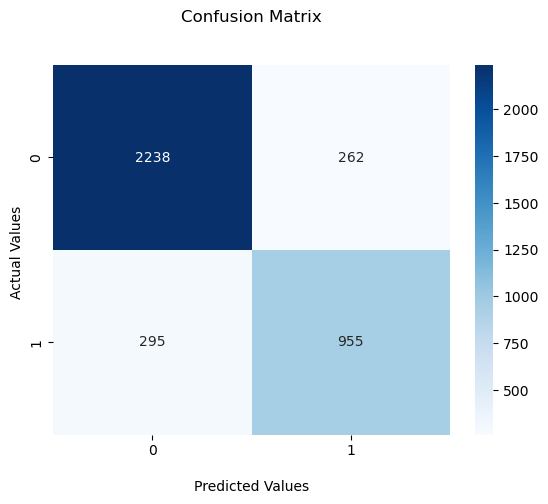

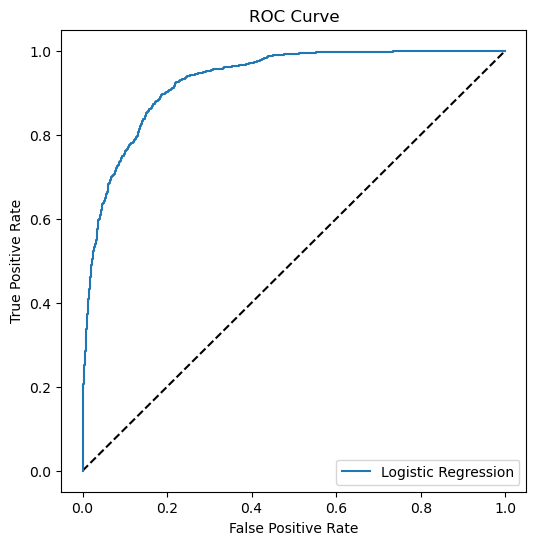

                 Model  F1_score       AUC
0  Logistic Regression   0.77422  0.929696


C:\Users\mnkku\AppData\Local\Temp\ipykernel_7464\3504140048.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    f1_score
)

# Inicjalizacja dataframe dla metryk
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked, metrics_dataframe):
    # Przechowywanie modelu i jego wyników
    models.append(model)
    models_names.append(name)
    
    # Predykcje
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:, 1])

    # Drukowanie metryk
    print(f"Model: {name}")
    print(classification_report(y_checked, predictions))

    # Macierz pomyłek
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # Krzywa ROC
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Wyliczanie metryk
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:, 1])
    # Usunięcie pustych kolumn w new_row przed dodaniem do dataframe
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    new_row = new_row.dropna(axis=1, how='all')  # Usuń kolumny, które mają tylko NaN
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


    return metrics_dataframe

# Wywołanie funkcji dla modelu Logistic Regression
metrics_dataframe = calculate_metrics(model_pipeline_v1, 'Logistic Regression', X_test, y_test, metrics_dataframe)

# Wyświetlenie zaktualizowanej tabeli metryk
print(metrics_dataframe)


In [261]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

class CreateCategoryColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()

        # Tworzenie kolumn kategorycznych
        X_transformed['PregnanciesGroup'] = pd.cut(
            X_transformed['Pregnancies'],
            bins=[-1, 0, 2, 5, np.inf],
            labels=['None', 'Low', 'Medium', 'High']
        )

        X_transformed['BMICategory'] = pd.cut(
            X_transformed['BMI'],
            bins=[-1, 18.5, 24.9, 29.9, np.inf],
            labels=['Underweight', 'Normal', 'Overweight', 'Obese']
        )

        X_transformed['AgeGroup'] = pd.cut(
            X_transformed['Age'],
            bins=[0, 20, 30, 40, 50, 60, 70, np.inf],
            labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
        )

        return X_transformed

# Kolumny numeryczne i kategoryczne
num_features = ['Age', 'Pregnancies', 'BMI', 'DiabetesPedigree']  # Kolumny numeryczne
cat_features = ['PregnanciesGroup', 'BMICategory', 'AgeGroup']  # Kolumny kategoryczne po stworzeniu

# Przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),  # Wypełnianie braków średnią
    ('polynomial_features', PolynomialFeatures(degree=3)),  # Dodanie cech wielomianowych
    ('scaler_1', StandardScaler()),  # Standaryzacja danych
    ('pca', PCA(n_components=0.95)),  # Redukcja wymiarów (95% wariancji)
    ('scaler_2', StandardScaler())   # Ponowna standaryzacja po PCA
])

# Przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),  # Wypełnianie braków najczęstszą wartością
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # One-Hot Encoding
])

# Transformer dla wartości numerycznych i kategorycznych
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

# Pipeline łączący tworzenie kategorii, preprocessing i model
model_pipeline_v2 = Pipeline(steps=[
    ('create_categories', CreateCategoryColumns()),  # Tworzenie kolumn kategorycznych
    ('preprocessor', data_preparation),              # Przetwarzanie danych
    ('model', LogisticRegression(max_iter=10000))    # Model regresji logistycznej
])

# Wyświetlenie struktury pipeline
print(model_pipeline_v2)


Pipeline(steps=[('create_categories', CreateCategoryColumns()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler_1',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95)),
                                                                  ('scaler_2',
                                                             

In [266]:
model_pipeline_v2.fit(X_train, y_train)

Pipeline(steps=[('create_categories', CreateCategoryColumns()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler_1',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95)),
                                                                  ('scaler_2',
                                                                   StandardScaler())]),
                                                  ['Age', 'Pregnancies', 'BMI',
                                                   'DiabetesPedigree']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['PregnanciesGroup',
                                                   'BMICategory',
                                                   'AgeGroup'])])),
                ('model', LogisticRegression(max_iter=10000))])

Model: Logistic Regression with PCA (Model 1)
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2500
           1       0.78      0.76      0.77      1250

    accuracy                           0.85      3750
   macro avg       0.83      0.83      0.83      3750
weighted avg       0.85      0.85      0.85      3750



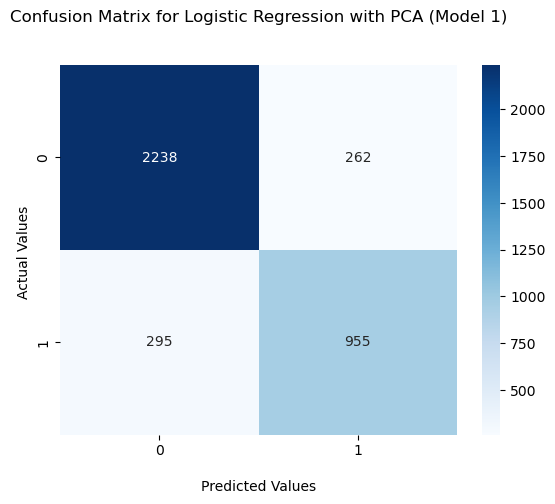

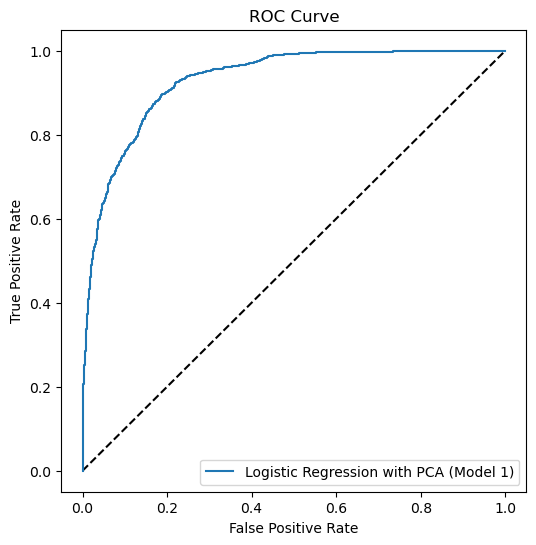

Model: Logistic Regression with PCA (Model 2)
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2500
           1       0.79      0.75      0.77      1250

    accuracy                           0.85      3750
   macro avg       0.83      0.82      0.83      3750
weighted avg       0.85      0.85      0.85      3750



C:\Users\mnkku\AppData\Local\Temp\ipykernel_7464\4053667863.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


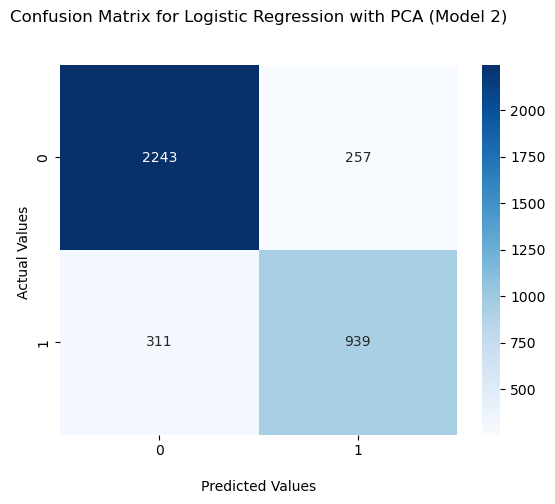

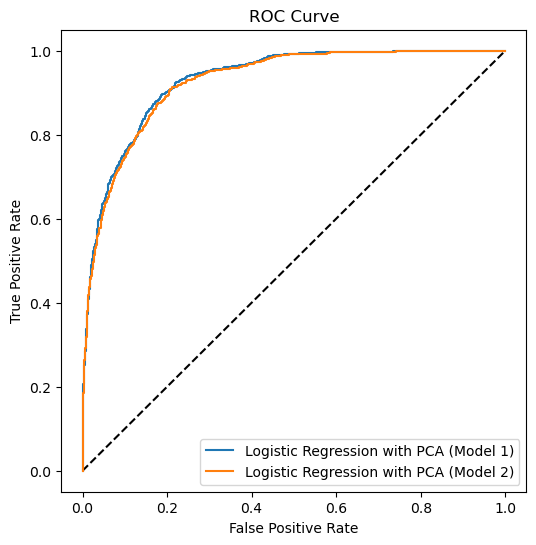

                                    Model  F1_score       AUC
0  Logistic Regression with PCA (Model 1)  0.774220  0.929696
1  Logistic Regression with PCA (Model 2)  0.767784  0.925660


In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    f1_score
)

# Inicjalizacja dataframe dla metryk
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked, metrics_dataframe):
    # Przechowywanie modelu i jego wyników
    models.append(model)
    models_names.append(name)
    
    # Predykcje
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:, 1])

    # Drukowanie metryk
    print(f"Model: {name}")
    print(classification_report(y_checked, predictions))

    # Macierz pomyłek
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title(f'Confusion Matrix for {name}\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # Krzywa ROC
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Wyliczanie metryk
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:, 1])
    
    # Usunięcie pustych kolumn w new_row przed dodaniem do dataframe
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    new_row = new_row.dropna(axis=1, how='all')  # Usuń kolumny, które mają tylko NaN
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)

    return metrics_dataframe

# Wywołanie funkcji dla modelu 1 (model_pipeline_v1)
metrics_dataframe = calculate_metrics(model_pipeline_v1, 'Logistic Regression with PCA (Model 1)', X_test, y_test, metrics_dataframe)

# Wywołanie funkcji dla modelu 2 (model_pipeline_v2)
metrics_dataframe = calculate_metrics(model_pipeline_v2, 'Logistic Regression with PCA (Model 2)', X_test, y_test, metrics_dataframe)

# Wyświetlenie zaktualizowanej tabeli metryk
print(metrics_dataframe)


Wnioski:
1.Różnice są minimalne, zarówno w przypadku F1-score, jak i AUC, ale model 1 (z PCA i innymi transformacjami) jest
    nieznacznie lepszy
2.Ostateczna decyzja o wyborze modelu zależy od naszych priorytetów. Jeśli chcemy, aby model miał lepszą równowagę
    między precyzją a czułością, a różnice są naprawdę małe, to możemy preferować model 1.
3.Oba modele mają bardzo wysokie wyniki (AUC powyżej 0.9), co oznacza, że są to bardzo dobre modele klasyfikacyjne.

In [279]:
model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [282]:
list(model_pipeline_v3.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'model',
 'preprocessor__n_jobs',
 'preprocessor__remainder',
 'preprocessor__sparse_threshold',
 'preprocessor__transformer_weights',
 'preprocessor__transformers',
 'preprocessor__verbose',
 'preprocessor__verbose_feature_names_out',
 'preprocessor__numeric_preprocessing',
 'preprocessor__categorical_preprocessing',
 'preprocessor__numeric_preprocessing__memory',
 'preprocessor__numeric_preprocessing__steps',
 'preprocessor__numeric_preprocessing__verbose',
 'preprocessor__numeric_preprocessing__fill_missings',
 'preprocessor__numeric_preprocessing__polynomial_features',
 'preprocessor__numeric_preprocessing__scaler_1',
 'preprocessor__numeric_preprocessing__pca',
 'preprocessor__numeric_preprocessing__scaler_2',
 'preprocessor__numeric_preprocessing__fill_missings__add_indicator',
 'preprocessor__numeric_preprocessing__fill_missings__copy',
 'preprocessor__numeric_preprocessing__fill_missings__fill_value',
 'preprocessor__numeric_pr